In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [2]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3
EPOCHS = 50

In [3]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "PlantVillage",
    shuffle=True,
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE
)


Found 2152 files belonging to 3 classes.


In [4]:
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [5]:
len(dataset)

68

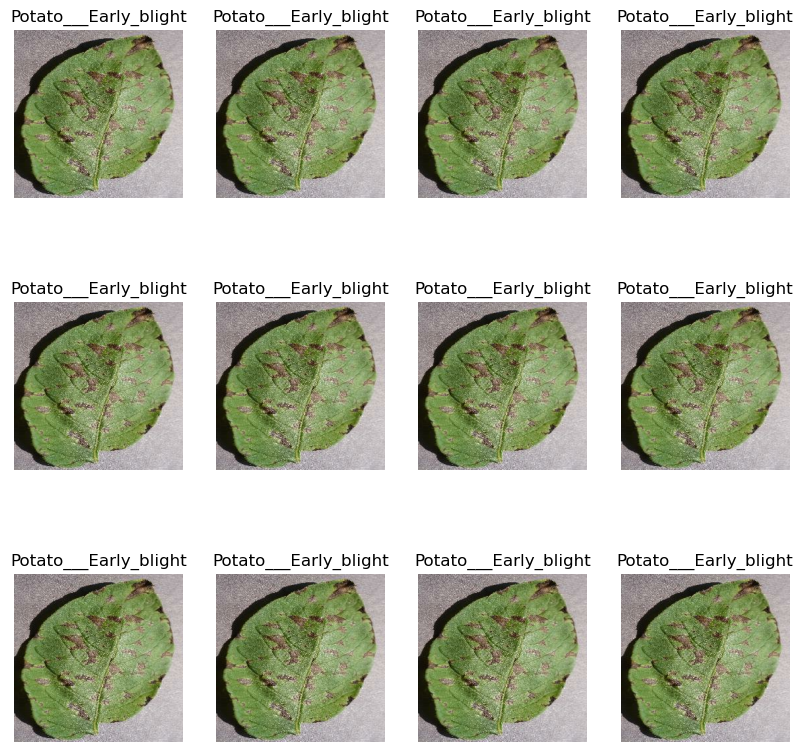

In [6]:
plt.figure(figsize = (10,10))
for image_batch, label_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3,4,i+1)
        plt.imshow(image_batch[0].numpy().astype("uint8"))
        plt.title(class_names[label_batch[0]])
        plt.axis("off")
    # print(image_batch[0].shape)
    # print(label_batch[5].numpy())

In [7]:
len(dataset)

68

In [8]:
# 80% ==> training
# 20% ==> 10% validation, 10% test

In [9]:
train_size = 0.8
len(dataset)*train_size

54.400000000000006

In [10]:
train_ds = dataset.take(54)
len(train_ds)

54

In [11]:
test_ds = dataset.skip(54)
len(test_ds)

14

In [12]:
val_size = 0.1
len(dataset)*val_size

6.800000000000001

In [13]:
val_ds = test_ds.take(6)
len(val_ds)

6

In [14]:
test_ds = test_ds.skip(6)
len(test_ds)

8

In [15]:
def get_dataset_partitions_tf(ds, train_split = 0.8,val_split = 0.1, test_split = 0.1, shuffle = True, shuffle_size=10000):
    ds_size = len(ds)

    if shuffle:
        ds = ds.shuffle(shuffle_size, seed = 12)
    
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)

    train_ds = ds.take(train_size)

    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)

    return train_ds, val_ds, test_ds

In [16]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [17]:
len(train_ds)

54

In [18]:
len(val_ds)

6

In [19]:
len(test_ds)

8

In [20]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
val_ds= val_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)

In [21]:
resize_and_rescale = tf.keras.Sequential([
    layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.Rescaling(1.0/255)
])



In [22]:
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2)
])

In [23]:
# from tensorflow.keras import layers, models

# input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)  # Define input shape without batch size
# n_classes = 3

# # Define resize_and_rescale with input shape in the first layer
# resize_and_rescale = tf.keras.Sequential([
#     layers.Resizing(IMAGE_SIZE, IMAGE_SIZE, input_shape=input_shape),  # Pass input_shape here
#     layers.Rescaling(1.0/255)
# ])

# # Define data_augmentation without input shape (optional)
# data_augmentation = tf.keras.Sequential([
#     layers.RandomFlip("horizontal_and_vertical"),
#     layers.RandomRotation(0.2)
# ])

# # Build the model
# model = models.Sequential([
#     resize_and_rescale,  # Already has input shape defined
#     data_augmentation,
#     layers.Conv2D(32, (3, 3), activation='relu'),
#     layers.MaxPooling2D((2, 2)),
#     layers.Conv2D(64, (3, 3), activation='relu'),
#     layers.MaxPooling2D((2, 2)),
#     layers.Conv2D(64, (3, 3), activation='relu'),
#     layers.MaxPooling2D((2, 2)),
#     layers.Conv2D(64, (3, 3), activation='relu'),
#     layers.MaxPooling2D((2, 2)),
#     layers.Flatten(),
#     layers.Dense(64, activation='relu'),
#     layers.Dense(n_classes, activation='softmax'),
# ])

# # No need for model.build() as input shape is already defined
# model.summary()


import tensorflow as tf
from tensorflow.keras import layers, models


input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)  # Define input shape without batch size
n_classes = 3

# Define resize_and_rescale with input shape in the first layer
resize_and_rescale = tf.keras.Sequential([
    layers.Resizing(IMAGE_SIZE, IMAGE_SIZE, input_shape=input_shape),  # Pass input_shape here
    layers.Rescaling(1.0/255)
])

# Define data_augmentation without input shape (optional)
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2)
])

# Build the model
model = models.Sequential([
    resize_and_rescale,  # Already has input shape defined
    data_augmentation,
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

# No need for model.build() as input shape is already defined
model.summary()


C:\Users\HP\anaconda3\Lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_2 (Sequential)       │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_3 (Sequential)       │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 28, 28, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       802,880 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 896,323 (3.42 MB)

 Trainable params: 896,323 (3.42 MB)

 Non-trainable params: 0 (0.00 B)

In [24]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = False),
    metrics = ['accuracy']
)

In [25]:
history =   model.fit(
    train_ds,
    epochs = EPOCHS,
    batch_size = BATCH_SIZE,
    verbose =1,
    validation_data =  val_ds
)

Epoch 1/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 30s 512ms/step - accuracy: 0.5548 - loss: 0.8710 - val_accuracy: 0.8438 - val_loss: 0.4472
Epoch 2/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 28s 527ms/step - accuracy: 0.8425 - loss: 0.3949 - val_accuracy: 0.7604 - val_loss: 0.6928
Epoch 3/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 32s 595ms/step - accuracy: 0.8706 - loss: 0.3262 - val_accuracy: 0.9375 - val_loss: 0.1784
Epoch 4/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 30s 550ms/step - accuracy: 0.9333 - loss: 0.1688 - val_accuracy: 0.9323 - val_loss: 0.1595
Epoch 5/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 30s 553ms/step - accuracy: 0.9448 - loss: 0.1480 - val_accuracy: 0.9219 - val_loss: 0.1687
Epoch 6/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 30s 549ms/step - accuracy: 0.9401 - loss: 0.1408 - val_accuracy: 0.9271 - val_loss: 0.1611
Epoch 7/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 30s 565ms/step - accuracy: 0.9711 - loss: 0.0836 - val_accuracy: 0.7188 - val_loss: 0.8232
Epoch 8/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 30s 548ms/step - accuracy: 0.9132 - loss: 0.2757 - val_accu

In [26]:
scores = model.evaluate(test_ds)

8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 279ms/step - accuracy: 0.9899 - loss: 0.0349


In [27]:
scores

[0.06268137693405151, 0.9765625]

In [28]:
history

In [29]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 54}

In [30]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [31]:
history.history['accuracy']

[0.6817129850387573,
 0.8472222089767456,
 0.8975694179534912,
 0.9201388955116272,
 0.9502314925193787,
 0.9461805820465088,
 0.9415509104728699,
 0.9351851940155029,
 0.9652777910232544,
 0.9635416865348816,
 0.9577546119689941,
 0.9652777910232544,
 0.9542824029922485,
 0.9646990895271301,
 0.9612268805503845,
 0.9797453880310059,
 0.9693287014961243,
 0.9641203880310059,
 0.9785879850387573,
 0.9681712985038757,
 0.9774305820465088,
 0.9861111044883728,
 0.9809027910232544,
 0.9872685074806213,
 0.9814814925193787,
 0.9733796119689941,
 0.9508101940155029,
 0.9716435074806213,
 0.9814814925193787,
 0.9861111044883728,
 0.9704861044883728,
 0.9849537014961243,
 0.9739583134651184,
 0.9670138955116272,
 0.9797453880310059,
 0.9745370149612427,
 0.9837962985038757,
 0.9612268805503845,
 0.9745370149612427,
 0.9814814925193787,
 0.9918981194496155,
 0.9872685074806213,
 0.9895833134651184,
 0.9890046119689941,
 0.9901620149612427,
 0.9884259104728699,
 0.9872685074806213,
 0.9733796119

In [32]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

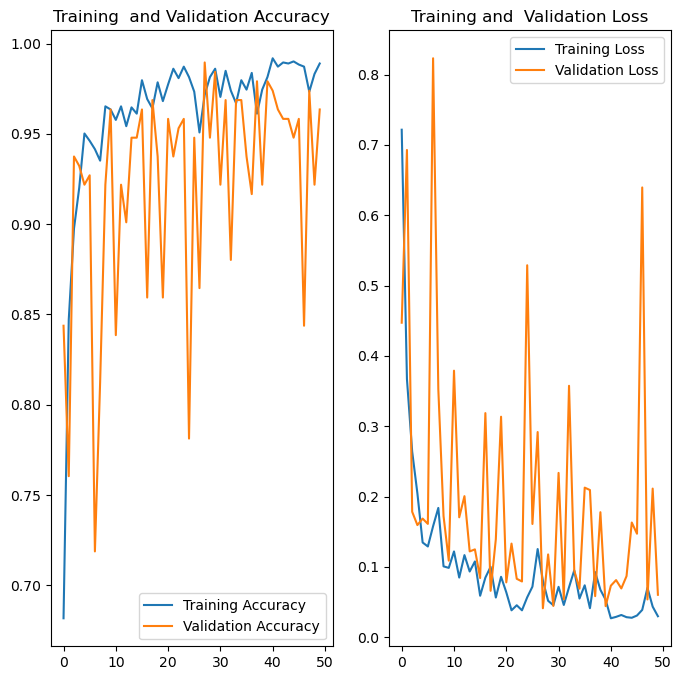

In [33]:
plt.figure(figsize = (8,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS),acc, label='Training Accuracy')
plt.plot(range(EPOCHS),val_acc ,label = "Validation Accuracy")
plt.legend(loc = 'lower right')
plt.title('Training  and Validation Accuracy')

plt.subplot(1,2,2)
plt.plot(range(EPOCHS),loss, label = 'Training Loss')
plt.plot(range(EPOCHS), val_loss, label = 'Validation Loss')
plt.legend(loc = 'upper right')
plt.title('Training and  Validation Loss')
plt.show()

first image  to predict
Actual label: Potato___healthy
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Predicted Label: Potato___healthy


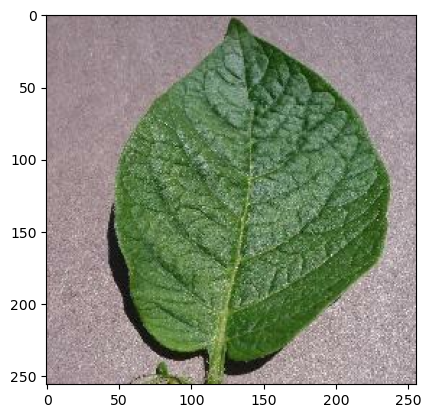

In [34]:
import numpy as np

for images_batch, labels_batch in test_ds.take(1):
    # plt.imshow(images_batch[0].numpy().astype('uint8'))

    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0]

    print("first image  to predict")
    plt.imshow(first_image)
    print("Actual label:", class_names[first_label])

    batch_prediction =  model.predict(images_batch)
    print("Predicted Label:", class_names[np.argmax(batch_prediction[0])])

In [35]:
def predict(model, img):
    # Correct the typo in 'preprocessing'
    img_array = tf.keras.preprocessing.image.img_to_array(img)  # Corrected from images[i].numpy() to img
    img_array = tf.expand_dims(img_array, 0)  # Create a batch

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    
    return predicted_class, confidence


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 571ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


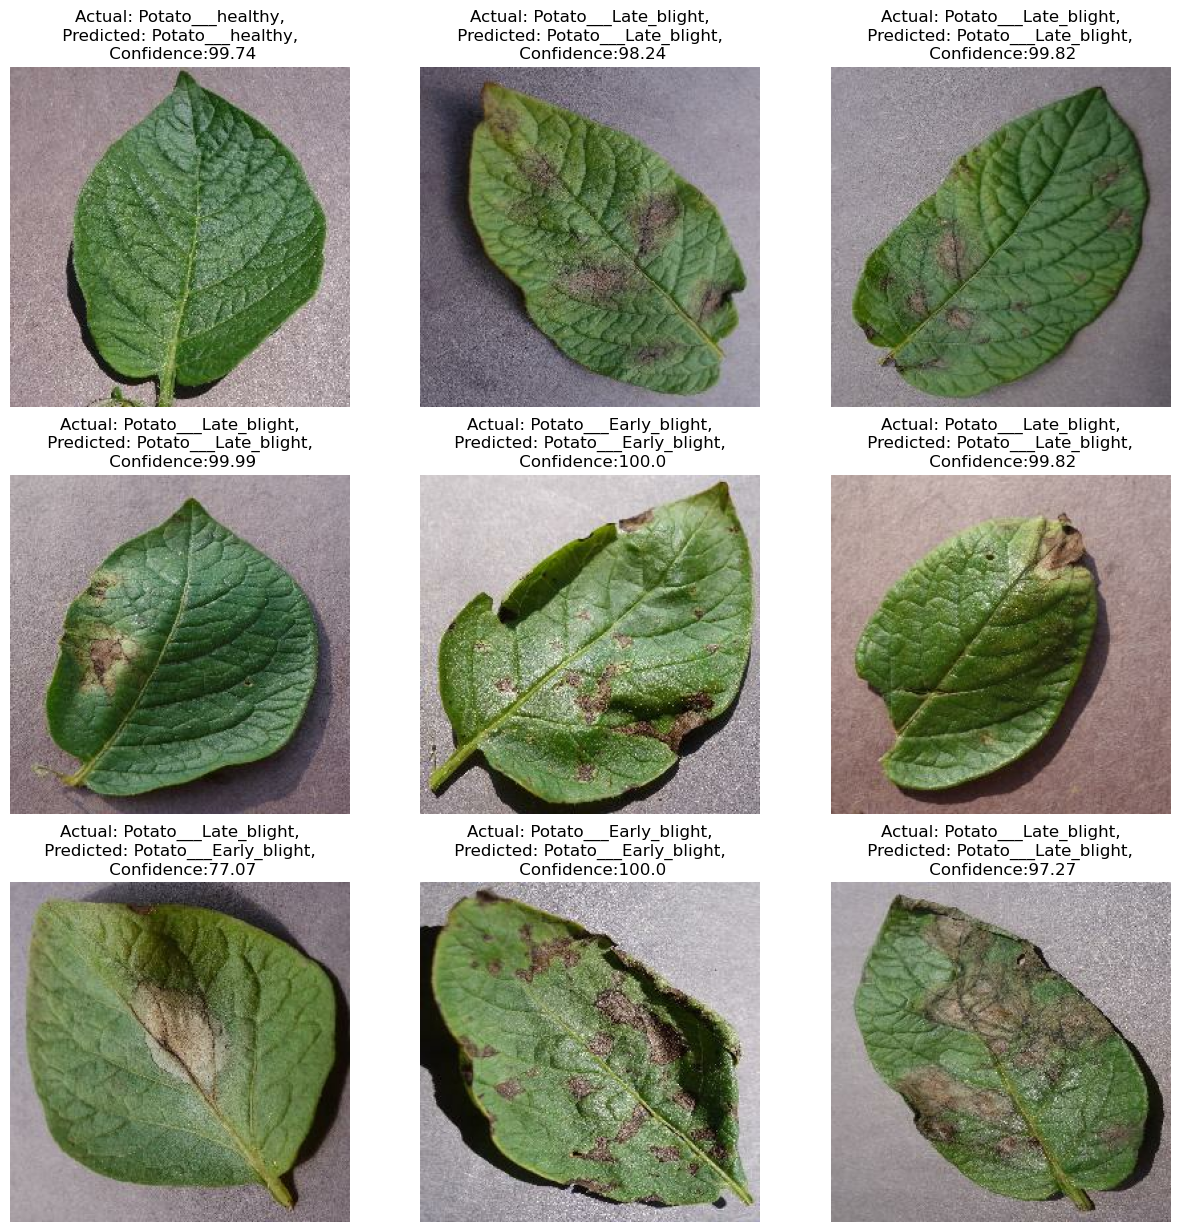

In [36]:
plt.figure(figsize=(15,15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax= plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))

        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]]
        

        plt.title(f'Actual: {actual_class},\n Predicted: {predicted_class}, \n Confidence:{confidence}')
        plt.axis("off")